In [1]:
#importting required libraries to be used
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
import math as m

In [2]:
#loading dataset as a dataframe from csv file
house_df = pd.read_csv(r"C:\Users\hp\Downloads\house-prices.csv")
house_df.rename(columns = {'Offers': 'Floor'}, inplace = True)
house_df

,Home,Price,SqFt,Bedrooms,Bathrooms,Floor,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


In [3]:
#Some statiscal features of our datasets
house_df.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Floor
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,37.094474,26868.770371,211.572431,0.725951,0.514492,1.069324
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000


In [4]:
#checking if any column of the dataset contain null values
#if it contains null values, wecan either remove that value or we can replace the value of that cell of that column with
#mean or median or mode value of the whole column
house_df.isnull().sum()

Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Floor           0
Brick           0
Neighborhood    0
dtype: int64

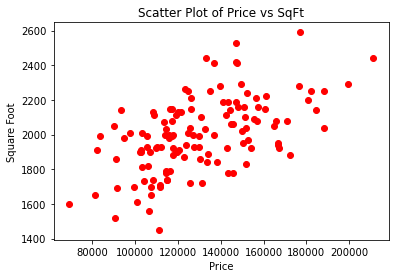

In [5]:
# Scatter Plot of Price vs SqFt
plt.xlabel("Price")
plt.ylabel("Square Foot")
plt.title("Scatter Plot of Price vs SqFt")
plt.scatter(house_df['Price'], house_df['SqFt'], color = "red")
plt.show()

In [6]:
#Prepairing indepenedent or predictor variable for the prediction of price
#Independent or predictor variable: SqFt, Bedrooms, Bathrooms, Floor
Predictor_Variable = house_df[['SqFt', 'Bedrooms', 'Bathrooms', 'Floor']]
Predictor_Variable

,SqFt,Bedrooms,Bathrooms,Floor
0,1790,2,2,2
1,2030,4,2,3
2,1740,3,2,1
3,1980,3,2,3
4,2130,3,3,3
...,...,...,...,...
123,1900,3,3,3
124,2160,4,3,3
125,2070,2,2,2
126,2020,3,3,1


In [7]:
#Target Variable or dependent varibale : whose value to be predicted using predictor varible ----> Price
#So we can say thet Price is functionally dependent on ----> SqFt, Bedrooms, Bathrooms and Floor
Target_Variable = house_df['Price']
Target_Variable

0      114300
1      114200
2      114800
3       94700
4      119800
        ...  
123    119700
124    147900
125    113500
126    149900
127    124600
Name: Price, Length: 128, dtype: int64

In [8]:
#Splitting dataset between training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(Predictor_Variable, Target_Variable, test_size = 0.3, random_state = 101)

In [9]:
#Building Regression Model for the prediction
lm = LinearRegression()

In [10]:
#Fitting the training data in our Linear Regression Model in order to train the model
lm.fit(x_train, y_train)

LinearRegression()

In [11]:
#Prediction of house prices on our testing data
predictions = lm.predict(x_test)
predictions

array([128495.04786738, 128495.04786738, 116237.545451  , 139530.40387605,
       142211.51490399, 126437.41261384, 159082.40765475, 123215.34368662,
        89298.59195585, 129050.88042871, 145178.73268777, 138203.56741309,
       146388.63739435, 140298.24950883, 155965.0287828 , 145989.41639254,
       159893.09135951, 149026.91035031, 116569.12323977, 102827.85106208,
       154506.06416257, 141769.45583019, 111848.40988919, 123215.34368662,
        96617.89845925, 119686.50211172, 132235.90251373, 110933.03612917,
       103476.13197755, 125297.78408124, 211408.9016707 , 106157.24300549,
       170741.23943781, 113863.20707075, 120202.65486992, 150977.22258767,
       123838.81946101, 163633.94600586, 136345.38179104])

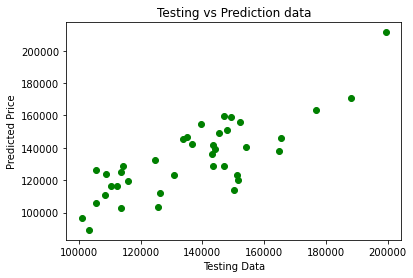

In [12]:
#visualizing our regression model
#Ploting the Testing vs Prediction data
plt.xlabel('Testing Data')
plt.ylabel('Predicted Price')
plt.title('Testing vs Prediction data')
plt.scatter(y_test, predictions, color = 'green')
plt.show()

In [13]:
#Prediction on individual data
square_foot = 2000
bedrooms = 2
bathrooms = 2
floor = 2
pred = lm.predict([[square_foot, bedrooms, bathrooms, floor]])
m.ceil(pred)

120934

In [14]:
house_df

,Home,Price,SqFt,Bedrooms,Bathrooms,Floor,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


In [15]:
#finding coefficient
lm.coef_

array([    62.34757744,  10199.86716283,  13821.15709186, -14152.73488063])

In [16]:
#finding intercept
lm.intercept_

-23498.279965883732

In [17]:
#prediction
y = (square_foot*62.34757744) + (bedrooms*10199.86716283) + (bathrooms*13821.15709186) + (floor*-14152.73488063) + (-23498.279965883732)
int(y)

120933

In [18]:
#accuracy of model
scr = lm.score(x_test, y_test)
print("accuracy score: ", m.ceil(scr*100), "%")

accuracy score:  60 %


In [19]:
#error in model
mse = metrics.mean_squared_error(y_test, predictions)
mae = metrics.mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)
print('mean absolute error: ', mae)
print('mean squared error: ', mse)
print('root mean squared error: ', rmse)

mean absolute error:  12354.245434412818
mean squared error:  222758906.5686885
root mean squared error:  14925.109934894566
